In [8]:
import random, numpy as np
from numpy import sqrt
from math import factorial

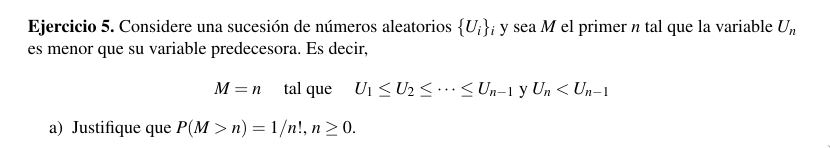

In [ ]:
'''
a)

P( M > n) = 1/n!

Pues

'''

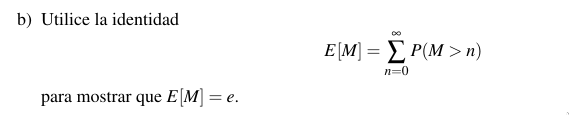

$e^x = \sum_{n=0}^{∞} \frac{x^n}{n!}$

$e = \sum_{n=0}^{∞} \frac{1}{n!}$
   $  = \sum_{n=0}^{∞} P(M > n)$
  $ = E[M]$

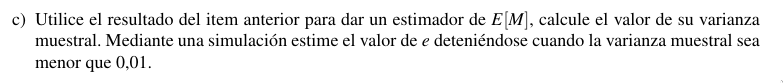

Recordar $Var(X) = σ^2$.

Segun el apunte (pag. 122) necesito una forma de generar $M$, para estimar $E[M]$ y por lo tanto $e$, por inciso $a)$ sabemos que $P(M > x) = \frac{1}{x!}$, ahora debemos obtener $P_{M}(x)$.

$F_{M}(X) = P(M \leq X) = 1 - P(M > X) = 1- \frac{1}{x!}$

Como M toma valores en ℕ $\cup$ {0}

\begin{align}
        \text{$P_{M}$}(x) = \left\{
        \begin{array}{cl}
        F_{M}(x) & x = 0 \\
        F_{M}(x) - F_{M}(x-1) & x \neq 0.
        \end{array}
        \right.
    \end{align}



\begin{align}
        \text{$P_{M}$}(x) = \left\{
        \begin{array}{cl}
        0 & x = 0 \\
        \frac{x-1}{x!} & x \neq 0.
        \end{array}
        \right.
    \end{align}

Con esto podemos usar el metodo de la transformada inversa.

$V(M)$ = $E[M^2]$ - $E[M]^2$

Luego vemos que
$E[M^2]$ $=$ $\sum_{n=0}^{∞}n^2p(n)$ $=$
$\sum_{n=2}^{∞}n\frac{1}{(n-2)!}$ $=$ $\sum_{n=0}^{∞}(n+2)\frac{1}{n!}$ $=$ $\sum_{n=0}^{∞} \frac{n}{n!} + \frac{2}{n!}$ $=$ $\sum_{n=0}^{∞} \frac{1}{(n-1)!}$ $+$ $2\sum_{n=0}^{∞}\frac{1}{n!}$ $=$ $e + 2e = 3e$

Entonces $V(M) = E[M^2] - E[M]^2 = 3e - e^2$

In [18]:
def M():
    n = 2
    u1 = random.random()
    u2 = random.random()
    while u1 <= u2:
        u1 = u2
        u2 = random.random()
        n += 1
    return n

def aprox_esperanza(d):
  media = M()
  s, n = 0, 1
  while n <= 100 or sqrt(s/n) > d:
    n += 1
    X = M()
    media_ant = media
    media = media_ant + (X - media_ant) / (n+1)
    s = s * (1 - 1/n) + (n+1)*(media - media_ant) ** 2
  return media, s, n

aprox_esperanza(0.001)

(2.717464607616272, 0.763650781081865, 763652)

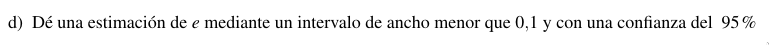

In [11]:
def aprox_esperanza(z_alfa_2, L):
  d = L / (2*z_alfa_2)
  media = M()
  s, n = 0, 1
  while n <= 100 or sqrt(s/n) > d:
    n += 1
    X = M()
    media_ant = media
    media = media_ant + (X - media_ant) / n
    s = sqrt(s * (1 - 1/(n-1)) + n*(media - media_ant) ** 2)
  return media, s, n

aprox_esperanza(1.96, 0.1)

(2.7356770833333344, 0.9995541723081939, 1536)